
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 2 <br>
<font color=696880 size=4>
<!-- <br> -->

____

In [2]:
first_name = 'Matin'
last_name = 'Bagheri'
student_number = '402105727'

# LU Decomposition

## LU Decomposition and System Solving

You are given a function `solve_system_via_lu(A, b)` that solves the linear system `(Ax = b)`
by performing:

1. **LU Decomposition**  
   Factor `A` into a lower-triangular matrix `L` and an upper-triangular matrix `U`.

2. **Forward Substitution**  
   Solve `(Ly = b)`.

3. **Backward Substitution**  
   Solve `(Ux = y)`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lu_decomposition(A):
    """
    Perform LU decomposition of matrix A (without pivoting).
    Returns L and U such that A = L*U.
    L will have 1s on the diagonal.
    """
    n = A.shape[0]
    L = np.identity(n)
    U = np.zeros_like(A, dtype=float)

    for row in range(n):
        for col in range(row, n):
            total = 0.0
            for k in range(row):
                total += L[row, k] * U[k, col]
            U[row, col] = A[row, col] - total

        for col in range(row + 1, n):
            total = 0.0
            for k in range(row):
                total += L[col, k] * U[k, row]
            if U[row, row] == 0:
                raise ValueError("Zero pivot encountered; LU without pivoting is unstable.")
            L[col, row] = (A[col, row] - total) / U[row, row]

    return L, U

def forward_substitution(L, b):
    """
    Solve L*y = b for y.
    """
    n = len(b)
    y = np.zeros_like(b, dtype=float)

    for i in range(n):
        accum = 0.0
        for j in range(i):
            accum += L[i, j] * y[j]
        y[i] = b[i] - accum

    return y

def backward_substitution(U, y):
    """
    Solve U*x = y for x.
    """
    n = len(y)
    x = np.zeros_like(y, dtype=float)

    for i in reversed(range(n)):
        accum = 0.0
        for j in range(i + 1, n):
            accum += U[i, j] * x[j]
        if U[i, i] == 0:
            raise ValueError("Zero diagonal element in U; cannot solve.")
        x[i] = (y[i] - accum) / U[i, i]

    return x

def solve_system_via_lu(A, b):
    L, U = lu_decomposition(A)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)

    return x, L, U

def visualize_matrix(matrix, title, ax):
    cax = ax.matshow(matrix, cmap='coolwarm')
    plt.colorbar(cax, ax=ax)
    ax.set_title(title, pad=15)

    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

def show_result(A, b, x, L, U):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    visualize_matrix(L, "Lower Matrix L", axes[0])
    visualize_matrix(U, "Upper Matrix U", axes[1])
    plt.tight_layout()
    plt.show()

    print("\nSolution x (rounded):")
    print(np.round(x, 2))

    Ax = A @ x
    print("\nCheck A * x (should be close to b):")
    print(Ax)

    print("\nVector b:")
    print(b)
    return

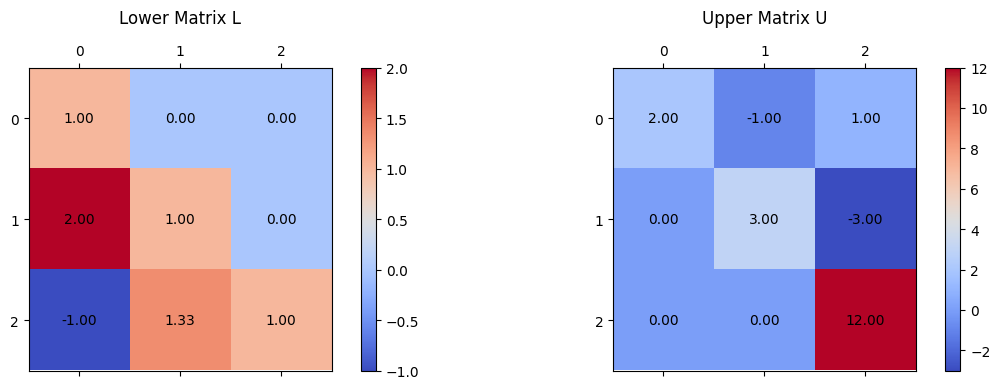


Solution x (rounded):
[0.5  0.33 0.33]

Check A * x (should be close to b):
[1. 2. 3.]

Vector b:
[1. 2. 3.]


In [3]:
## Example 1: 3x3

A_3x3 = np.array([
    [2, -1,  1],
    [4,  1, -1],
    [-2, 5, 7]
], dtype=float)

b_3x3 = np.array([1, 2, 3], dtype=float)

x_3x3, L_3x3, U_3x3 = solve_system_via_lu(A_3x3, b_3x3)  # Fixed function call

show_result(A_3x3, b_3x3, x_3x3, L_3x3, U_3x3)

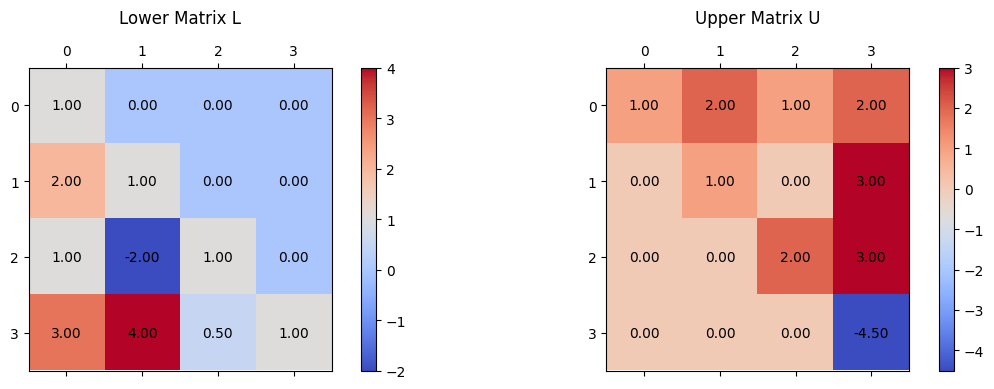


Solution x (rounded):
[ 3.11 -6.33  1.33  5.11]

Check A * x (should be close to b):
[ 2. 13.  2. 28.]

Vector b:
[ 2. 13.  2. 28.]


In [4]:
## Example 2: 4x4

A_4x4 = np.array([
    [1,  2,  1,  2],
    [2,  5,  2,  7],
    [1,  0,  3, -1],
    [3, 10,  4, 15]
], dtype=float)

b_4x4 = np.array([2, 13, 2, 28], dtype=float)

x_4x4, L_4x4, U_4x4 = solve_system_via_lu(A_4x4, b_4x4)

show_result(A_4x4, b_4x4, x_4x4, L_4x4, U_4x4)

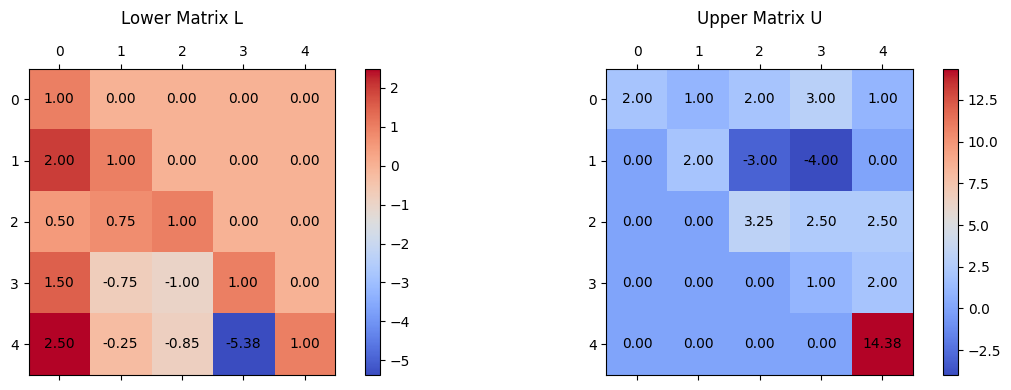


Solution x (rounded):
[ 2.07 -1.77 -2.25  2.05  2.97]

Check A * x (should be close to b):
[ 7.  9.  5. 17. 14.]

Vector b:
[ 7.  9.  5. 17. 14.]


In [5]:
## Example 3: 5x5

A_5x5 = np.array([
    [2,  1,  2,  3,  1],
    [4,  4,  1,  2,  2],
    [1,  2,  2,  1,  3],
    [3,  0,  2,  6,  1],
    [5,  2,  3,  1,  4]
], dtype=float)

b_5x5 = np.array([7, 9, 5, 17, 14], dtype=float)

x_5x5, L_5x5, U_5x5 = solve_system_via_lu(A_5x5, b_5x5)

show_result(A_5x5, b_5x5, x_5x5, L_5x5, U_5x5)

# Matrix Inversion via Gauss-Jordan Elimination

## Matrix Inversion via RREF
Implement a function that computes the inverse of a matrix by applying the Gauss-Jordan elimination (RREF) method to an augmented matrix
[
𝐴
∣
𝐼
]
. Once you've written and tested this function, demonstrate its correctness by running the examples.

In [6]:
import numpy as np

def matrix_inverse_via_rref(A):
    """
    Compute the inverse of a matrix A by forming an augmented matrix [A | I]
    and performing Gauss-Jordan elimination to convert A into the identity.
    The right side will then become the inverse of A.

    Parameters
    ----------
    A : numpy.ndarray
        The square matrix to be inverted (size n x n).

    Returns
    -------
    numpy.ndarray
        The inverse of A if it exists.

    Raises
    ------
    ValueError
        If A is not invertible.
    """

    # Convert A to float (if it's not already) to avoid integer division issues
    # Create an augmented matrix [A | I]
    # Perform Gauss-Jordan elimination
        # 1) Find the pivot in column i (partial pivoting)
        # If the pivot is effectively zero, raise error (matrix is singular)
        # 2) Swap the pivot row into position
        # 3) Normalize pivot row so pivot element is 1
        # 4) Eliminate all other entries in column i
    # The right side is now the inverse of A


    A = np.array(A, dtype=float)
    n = A.shape[0]

    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square.")

    # Augment A with the identity matrix
    aug = np.concatenate((A, np.eye(n)), axis=1)

    for i in range(n):
        # Partial pivoting
        pivot_row = max(range(i, n), key=lambda r: abs(aug[r, i]))
        if abs(aug[pivot_row, i]) < 1e-12:
            raise ValueError("Matrix is singular and not invertible.")
        if pivot_row != i:
            aug[[i, pivot_row]] = aug[[pivot_row, i]]

        # Normalize pivot row
        aug[i] = aug[i] / aug[i, i]

        # Eliminate all other entries in the pivot column
        for j in range(n):
            if j != i:
                aug[j] -= aug[j, i] * aug[i]

    return aug[:, n:]

In [7]:
mat_4x4 = np.array([
    [1,  3,  1,  9],
    [2,  6,  0,  4],
    [3,  9,  7,  1],
    [2,  1,  8,  6]
], dtype=float)


try:
    inv_4x4 = matrix_inverse_via_rref(mat_4x4)
    print("1)Inverse:\n", np.round(inv_4x4, 2))
    product_4x4 = np.dot(mat_4x4, inv_4x4)
    print("Check A * A^-1 (should be close to identity):\n", np.round(product_4x4, 2))
except ValueError as e:
    print("Error:", e)
print("\n-----------------------------------------------------\n")


mat_5x5 = np.array([
    [2,  5,  1,  0,  3],
    [1,  2,  3,  4,  5],
    [2,  1,  1,  2,  4],
    [1,  1,  1,  1,  1],
    [4,  2,  2,  5,  7]
], dtype=float)


try:
    inv_5x5 = matrix_inverse_via_rref(mat_5x5)
    print("2)Inverse:\n", np.round(inv_5x5, 2))
    product_5x5 = np.dot(mat_5x5, inv_5x5)
    print("Check A * A^-1 (should be close to identity):\n", np.round(product_5x5, 2))
except ValueError as e:
    print("Error:", e)
print("\n-----------------------------------------------------\n")


mat_4x4 = np.array([
    [1,  1,   2,   3],
    [6,  7,  11,  15],
    [2,  3,   4,   5],
    [3,  4,   5,   6]
], dtype=float)

try:
    inv_4x4 = matrix_inverse_via_rref(mat_4x4)
    print("3)Inverse:\n", np.round(inv_4x4, 2))
    product_4x4 = np.dot(mat_4x4, inv_4x4)
    print("Check A * A^-1 (should be close to identity):\n", np.round(product_4x4, 2))
except ValueError as e:
    print("Error:", e)
print("\n-----------------------------------------------------")

1)Inverse:
 [[-0.86  1.17 -0.56  0.6 ]
 [ 0.2  -0.2   0.2  -0.2 ]
 [ 0.09 -0.24  0.13  0.  ]
 [ 0.13 -0.04 -0.02  0.  ]]
Check A * A^-1 (should be close to identity):
 [[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [-0.  0.  1.  0.]
 [-0.  0. -0.  1.]]

-----------------------------------------------------

2)Inverse:
 [[-0.1  -0.39  0.37  0.95 -0.02]
 [ 0.27  0.07 -0.76 -0.37  0.32]
 [-0.22  0.12  1.07  1.39 -0.8 ]
 [ 0.02  0.1  -1.34 -0.49  0.76]
 [ 0.02  0.1   0.66 -0.49 -0.24]]
Check A * A^-1 (should be close to identity):
 [[ 1. -0. -0. -0. -0.]
 [ 0.  1. -0. -0. -0.]
 [ 0.  0.  1. -0.  0.]
 [ 0. -0. -0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]

-----------------------------------------------------

Error: Matrix is singular and not invertible.

-----------------------------------------------------


## Hill-Cipher-Like Encryption:
Next, incorporate your matrix-inversion function into a Hill-cipher-like encryption scheme. In particular, you will encrypt five-letter messages using a matrix-based key, then decrypt by using the inverse of that key matrix. Complete any remaining parts of the code, and test your results.

In [8]:
def modinv(a, m):
    """
    Compute the modular inverse of 'a' under modulus 'm' using the Extended Euclidean Algorithm.
    """
    m0, x0, x1 = m, 0, 1
    if m == 1:
        return 0

    # Complete the loop using these steps exactly:
    #       1) Compute q = a // m   (integer division)
    #       2) Compute remainder = a % m
    #       3) Update a = m
    #       4) Update m = remainder
    #       5) Temporarily store old x0 in a variable (e.g., temp)
    #       6) Update x0 = x1 - q * x0
    #       7) Update x1 = temp
    while a > 1:
        q = a // m                        # Step 1
        remainder = a % m                 # Step 2
        a = m                             # Step 3
        m = remainder                     # Step 4
        temp = x0                         # Step 5
        x0 = x1 - q * x0                  # Step 6
        x1 = temp                         # Step 7

    # Finally, if x1 is negative, shift it by m0 to ensure it's within [0, m0)
    return x1 + m0 if x1 < 0 else x1

def matrix_mod_inv(matrix, mod=26):
    # Compute the determinant of 'matrix' and round to nearest integer.
    det = int(round(np.linalg.det(matrix)))
    # Find the modular inverse of det in Z_mod.
    det_inv = modinv(det % mod, mod)
    if det_inv is None:
        raise ValueError("Matrix is not invertible under modulo 26")

    # Obtain the standard (float-based) inverse of 'matrix' by using your RREF function.
    inverse = matrix_inverse_via_rref(matrix.astype(float))  # completed

    # Multiply this float-based inverse by the integer determinant 'det',
    #       round the result to correct for floating-point imprecision,
    #       and reduce each entry modulo 'mod' to form the adjugate matrix.
    adjugate = np.round(inverse * det).astype(int) % mod  # completed

    # Multiply the 'adjugate' matrix by 'det_inv' (the determinant's modular inverse),
    #       and then reduce the result modulo 'mod' and return it.
    return (adjugate * det_inv % mod).astype(int)  # completed

def encrypt(message, key_2x2, key_3x3):
    message = message.upper()

    # Encrypt with 2x2 matrix
    key_matrix_2x2 = np.array([ord(key_2x2[i]) % 65 for i in range(4)]).reshape(2, 2)
    message_vector_2x2 = np.array([ord(message[i]) % 65 for i in range(2)]).reshape(2, 1)
    cipher_vector_2x2 = np.dot(key_matrix_2x2, message_vector_2x2) % 26
    cipher_text_2x2 = ''.join(chr(int(c) + 65) for c in cipher_vector_2x2.flatten())

    # Encrypt with 3x3 matrix
    key_matrix_3x3 = np.array([ord(key_3x3[i]) % 65 for i in range(9)]).reshape(3, 3)
    message_vector_3x3 = np.array([ord(message[i + 2]) % 65 for i in range(3)]).reshape(3, 1)
    cipher_vector_3x3 = np.dot(key_matrix_3x3, message_vector_3x3) % 26
    cipher_text_3x3 = ''.join(chr(int(c) + 65) for c in cipher_vector_3x3.flatten())

    cipher_text = cipher_text_2x2 + cipher_text_3x3
    print("Ciphertext:", cipher_text)
    return cipher_text

def decrypt(cipher_text, key_2x2, key_3x3):
    cipher_text = cipher_text.upper()

    key_matrix_2x2 = np.array([ord(key_2x2[i]) % 65 for i in range(4)]).reshape(2, 2)
    key_matrix_inv_2x2 = matrix_mod_inv(key_matrix_2x2, 26)
    cipher_vector_2x2 = np.array([ord(cipher_text[i]) % 65 for i in range(2)]).reshape(2, 1)
    plain_vector_2x2 = np.dot(key_matrix_inv_2x2, cipher_vector_2x2) % 26
    plain_text_2x2 = ''.join(chr(int(c) + 65) for c in plain_vector_2x2.flatten())

    key_matrix_3x3 = np.array([ord(key_3x3[i]) % 65 for i in range(9)]).reshape(3, 3)
    key_matrix_inv_3x3 = matrix_mod_inv(key_matrix_3x3, 26)
    cipher_vector_3x3 = np.array([ord(cipher_text[i + 2]) % 65 for i in range(3)]).reshape(3, 1)
    plain_vector_3x3 = np.dot(key_matrix_inv_3x3, cipher_vector_3x3) % 26
    plain_text_3x3 = ''.join(chr(int(c) + 65) for c in plain_vector_3x3.flatten())

    plain_text = plain_text_2x2 + plain_text_3x3
    print("Decrypted Text:", plain_text)
    print("-" * 60)
    return plain_text

In [9]:
key_2x2 = "DTER"
key_3x3 = "GYBNQKURP"

message = "NASIM"
enc_message = encrypt(message, key_2x2, key_3x3)
dec_message = decrypt(enc_message, key_2x2, key_3x3)

message = "ARIAN"
enc_message = encrypt(message, key_2x2, key_3x3)
dec_message = decrypt(enc_message, key_2x2, key_3x3)

message = "RADIN"
enc_message = encrypt(message, key_2x2, key_3x3)
dec_message = decrypt(enc_message, key_2x2, key_3x3)

message = "ZZZZZ"
enc_message = encrypt(message, key_2x2, key_3x3)
dec_message = decrypt(enc_message, key_2x2, key_3x3)

Ciphertext: NAAOA
Decrypted Text: NASIM
------------------------------------------------------------
Ciphertext: LDJAR
Decrypted Text: ARIAN
------------------------------------------------------------
Ciphertext: ZQPLB
Decrypted Text: RADIN
------------------------------------------------------------
Ciphertext: EFVNA
Decrypted Text: ZZZZZ
------------------------------------------------------------


# Determinant via Gaussian Elimination


In this problem, you are asked to write a function that computes the determinant of a square matrix using Gaussian elimination with partial pivoting. Rather than using the traditional cofactor expansion, you will convert the matrix into an upper triangular form, then compute the determinant as the product of its diagonal elements, adjusting for any row swaps.

## Problem Statement

Write a function `compute_determinant_elimination(A)` that takes a square matrix `A` (represented as a NumPy array) and returns its determinant calculated via Gaussian elimination. Remember that each time you swap two rows during the elimination process, the sign of the determinant is flipped. Do **not** use built-in functions such as `numpy.linalg.det`.

### Steps to Solve

1. **Copy the Matrix:**  
   To avoid modifying the original matrix, work on a copy of `A`.

2. **Partial Pivoting:**  
   For each column, find the pivot (the row with the largest absolute value in the current column starting from the diagonal element) and swap rows if necessary. Count the number of swaps since each swap flips the sign of the determinant.

3. **Row Elimination:**  
   Use Gaussian elimination to convert the matrix into an upper triangular matrix. This is achieved by eliminating the elements below the pivot in each column.

4. **Compute the Determinant:**  
   The determinant is the product of the diagonal elements of the upper triangular matrix, multiplied by $$  ((-1)^{\text{swap count}}). $$

### Example

Consider the matrix:
$$
A = \begin{bmatrix}
2 & 1 & 3 \\
4 & 1 & 6 \\
-1 & 2 & 1
\end{bmatrix}
$$

After performing Gaussian elimination with partial pivoting, you will obtain an upper triangular matrix. The determinant is then computed as:
$$
\text{det}(A) = (-1)^{\text{swap count}} \times \text{(product of diagonal elements)}
$$

In [10]:
import numpy as np

def partial_pivoting(A, i):
    """
    Implement the partial pivoting procedure.
    
    Given a matrix A and an index i, find the pivot row in column i (the row 
    with the largest absolute value from row i downwards) and swap it with row i.
    
    Parameters:
        A (numpy.ndarray): The working matrix.
        i (int): The current pivot index.
    
    Returns:
        A (numpy.ndarray): The updated matrix after pivoting.
        swap_count (int): The number of swaps performed (0 or 1).
    """
    swap_count = 0
    n = A.shape[0]
    # Complete the code
    pivot_row_index = i

    for j in range(i + 1, n):
        if abs(A[j, i]) > abs(A[pivot_row_index, i]):
            pivot_row_index = j

    if pivot_row_index != i:
        A[[i, pivot_row_index]] = A[[pivot_row_index, i]]
        swap_count = 1

    return A, swap_count

def gaussian_elimination(A):
    """
    Implement Gaussian elimination with partial pivoting.
    
    Convert matrix A into an upper triangular matrix using partial pivoting.
    For each pivot position, perform partial pivoting, then eliminate the entries
    below the pivot.
    
    Parameters:
        A (numpy.ndarray): A square matrix of shape (n, n).
    
    Returns:
        A (numpy.ndarray): The upper triangular matrix after elimination.
        total_swaps (int): Total number of row swaps performed.
    """
    n = A.shape[0]
    total_swaps = 0
    # Complete the code
    n = A.shape[0]
    total_swaps = 0

    for i in range(n):
        # Pivot and track swaps
        A, swaps = partial_pivoting(A, i)
        total_swaps += swaps

        pivot = A[i, i]

        if np.isclose(pivot, 0):
            continue  # Singular pivot; no need to proceed with elimination

        for j in range(i + 1, n):
            factor = A[j, i] / pivot
            A[j, i:] -= factor * A[i, i:]

    return A, total_swaps

def compute_determinant_elimination(A):
    """
    Compute the determinant of a square matrix A using Gaussian elimination with partial pivoting.
    
    use the above functions to perform the elimination,
    then compute the determinant as the product of the diagonal elements, adjusted for
    the number of row swaps.
    
    Parameters:
        A (numpy.ndarray): A square matrix of shape (n, n).
        
    Returns:
        float: The determinant of matrix A.
    """
    # Complete the code
    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square.")

    if A.size == 0:
        return 1.0  # Convention: determinant of empty matrix is 1

    A_copy = A.copy().astype(float)
    U, total_swaps = gaussian_elimination(A_copy)

    diag_product = np.prod(np.diag(U))
    det = diag_product if total_swaps % 2 == 0 else -diag_product
    return det


In [11]:
# Example 1: 3x3 Matrix
A1 = np.array([[2, 1, 3],
               [4, 1, 6],
               [-1, 2, 1]])
det1 = compute_determinant_elimination(A1)
print("Determinant of A1 (3x3):", det1)

Determinant of A1 (3x3): -5.0


In [12]:
# Example 2: 4x4 Matrix
A2 = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [2, 6, 4, 8],
               [3, 1, 1, 2]])
det2 = compute_determinant_elimination(A2)
print("Determinant of A2 (4x4):", det2)

Determinant of A2 (4x4): 72.00000000000001


In [13]:
# Example 3: 2x2 Matrix
A3 = np.array([[1, 2],
               [3, 4]])
det3 = compute_determinant_elimination(A3)
print("Determinant of A3 (2x2):", det3)

Determinant of A3 (2x2): -2.0


# Diagonalization and Matrix Powers


In this exercise, you will explore the concept of diagonalization for linear transformations and use it to compute high powers of a matrix.

## Problem Statement

Given a square matrix $A$, your task is to:

1. **Check Diagonalizability:**  
   Write a function `is_diagonalizable(A)` that determines if $A$ is diagonalizable. A matrix is diagonalizable if it has a full set of linearly independent eigenvectors (i.e., if the matrix formed by the eigenvectors is invertible).

2. **Diagonalize the Matrix:**  
   If $A$ is diagonalizable, write a function `diagonalize(A)` that computes:
   - $P$: A matrix whose columns are the eigenvectors of $A$.
   - $D$: A diagonal matrix whose diagonal entries are the corresponding eigenvalues.
   - $P^{-1}$: The inverse of $P$.  
   Such that:
   $$
   A = P \, D \, P^{-1}.
   $$

3. **Compute Matrix Powers:**  
   Use the diagonalization to compute $A^n$ for any positive integer $n$. Write a function `power_matrix(A, n)` that computes:
   $$
   A^n = P \, D^n \, P^{-1},
   $$
   where $D^n$ is computed by raising each diagonal element of $D$ to the $n$ th power.




In [14]:
import numpy as np

def is_diagonalizable(A):
    """
    Determine if the square matrix A is diagonalizable.
    
    Parameters:
        A (numpy.ndarray): A square matrix of shape (n, n).
    
    Returns:
        bool: True if A is diagonalizable, False otherwise.
    """
    # Complete the code
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("Input must be a square matrix.")
    
    try:
        _, P = np.linalg.eig(A)
    except np.linalg.LinAlgError:
        return False

    return np.abs(np.linalg.det(P)) > 1e-10

def diagonalize(A):
    """
    Diagonalize the matrix A.
    
    If A is diagonalizable, return matrices P, D, and P_inv such that A = P D P_inv.
    
    Parameters:
        A (numpy.ndarray): A square matrix of shape (n, n).
    
    Returns:
        tuple: (P, D, P_inv)
            - P: The matrix of eigenvectors (each column is an eigenvector).
            - D: The diagonal matrix of eigenvalues.
            - P_inv: The inverse of P.
    """
    # Complete the code
    eigenvalues, P = np.linalg.eig(A)
    D = np.diag(eigenvalues)
    P_inv = np.linalg.inv(P)
    return P, D, P_inv

def power_matrix(A, n):
    """
    Compute A^n using the diagonalization A = P D P_inv.
    
    Parameters:
        A (numpy.ndarray): A square matrix of shape (n, n).
        n (int): The power to which A is to be raised.
    
    Returns:
        numpy.ndarray: The matrix A raised to the power n.
        
    If A is not diagonalizable, the function should raise an error or return an appropriate message.
    """
    if not is_diagonalizable(A):
        raise ValueError("The matrix A is not diagonalizable.")
    # Complete the code
    P, D, P_inv = diagonalize(A)

    # Raise diagonal matrix to the power n
    diag_Dn = np.diag(D).astype(np.complex128) ** n
    Dn = np.diag(diag_Dn)

    A_n = P @ Dn @ P_inv

    return np.real(A_n) if not np.iscomplexobj(A) else A_n


In [15]:
# Example 1: 2x2 Matrix
A1 = np.array([[4, 1],
               [2, 3]])
print("Example 1: 2x2 Matrix")
print("A1 =\n", A1)
print("Diagonalizable?", is_diagonalizable(A1))
if is_diagonalizable(A1):
    P, D, P_inv = diagonalize(A1)
    print("P =\n", P)
    print("D =\n", D)
    print("P_inv =\n", P_inv)
    n = 3
    print(f"A1^{n} =\n", power_matrix(A1, n))
print("\n-------------------\n")

Example 1: 2x2 Matrix
A1 =
 [[4 1]
 [2 3]]
Diagonalizable? True
P =
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
D =
 [[5. 0.]
 [0. 2.]]
P_inv =
 [[ 0.94280904  0.47140452]
 [-0.74535599  0.74535599]]
A1^3 =
 [[86. 39.]
 [78. 47.]]

-------------------



In [16]:
# Example 2: 3x3 Matrix
A2 = np.array([[5, 4, 2],
               [0, 1, -1],
               [0, 0, 3]])
print("Example 2: 3x3 Matrix")
print("A2 =\n", A2)
print("Diagonalizable?", is_diagonalizable(A2))
if is_diagonalizable(A2):
    P, D, P_inv = diagonalize(A2)
    print("P =\n", P)
    print("D =\n", D)
    print("P_inv =\n", P_inv)
    n = 4
    print(f"A2^{n} =\n", power_matrix(A2, n))
print("\n-------------------\n")

Example 2: 3x3 Matrix
A2 =
 [[ 5  4  2]
 [ 0  1 -1]
 [ 0  0  3]]
Diagonalizable? True
P =
 [[ 1.         -0.70710678  0.        ]
 [ 0.          0.70710678 -0.4472136 ]
 [ 0.          0.          0.89442719]]
D =
 [[5. 0. 0.]
 [0. 1. 0.]
 [0. 0. 3.]]
P_inv =
 [[1.         1.         0.5       ]
 [0.         1.41421356 0.70710678]
 [0.         0.         1.11803399]]
A2^4 =
 [[625. 624. 312.]
 [  0.   1. -40.]
 [  0.   0.  81.]]

-------------------



In [17]:
# Example 3: Another 3x3 Matrix
A3 = np.array([[2, 0, 0],
               [1, 3, 4],
               [0, 0, 3]])
print("Example 3: 3x3 Matrix")
print("A3 =\n", A3)
print("Diagonalizable?", is_diagonalizable(A3))
if is_diagonalizable(A3):
    P, D, P_inv = diagonalize(A3)
    print("P =\n", P)
    print("D =\n", D)
    print("P_inv =\n", P_inv)
    n = 5
    print(f"A3^{n} =\n", power_matrix(A3, n))

Example 3: 3x3 Matrix
A3 =
 [[2 0 0]
 [1 3 4]
 [0 0 3]]
Diagonalizable? False


# Full SVD vs. Randomized SVD

## Full SVD

For any matrix $ A \in \mathbb{R}^{m \times n} $, the full Singular Value Decomposition (SVD) factorizes it as:

$$
A = U \Sigma V^T,
$$

where:

- $ U \in \mathbb{R}^{m \times m} $ is an orthogonal matrix whose columns are the left singular vectors.
- $ \Sigma \in \mathbb{R}^{m \times n} $ is a diagonal matrix containing the singular values $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_{\min(m,n)} \geq 0$.
- $ V \in \mathbb{R}^{n \times n} $ is an orthogonal matrix whose columns are the right singular vectors.

In many practical applications, we use the **economy SVD** (or reduced SVD), where we keep only the $ r $ nonzero singular values (with $ r $ being the rank of $ A $):

$$
A = U_r \Sigma_r V_r^T,
$$

with $ U_r \in \mathbb{R}^{m \times r} $, $\Sigma_r \in \mathbb{R}^{r \times r}$, and $ V_r \in \mathbb{R}^{n \times r} $.

## Randomized SVD

Randomized SVD is an approximate method designed to efficiently compute the dominant $ k $ singular values and corresponding singular vectors when $ k \ll \min(m, n) $. The procedure involves:

1. **Random Projection:**

   Generate a random matrix $ \Omega \in \mathbb{R}^{n \times k} $ (e.g., with i.i.d. Gaussian entries) and compute the sample matrix:

   $$
   Y = A \Omega.
   $$

2. **Form an Orthonormal Basis:**

   Compute the QR decomposition of $ Y $ to obtain an orthonormal matrix $ Q \in \mathbb{R}^{m \times k} $:

   $$
   Y = Q R.
   $$

3. **Project and Compute SVD on a Smaller Matrix:**

   Project $ A $ onto the subspace spanned by $ Q $:

   $$
   B = Q^T A.
   $$

   Then, perform the SVD on the smaller matrix $ B $:

   $$
   B = \tilde{U} \Sigma V^T.
   $$

4. **Approximate SVD of $ A $:**

   The approximate SVD of $ A $ is then given by:

   $$
   A \approx Q \tilde{U} \Sigma V^T.
   $$


In [19]:
import numpy as np
import time
from sklearn.utils.extmath import randomized_svd
from numpy.linalg import svd, norm

In [20]:
# Set matrix dimensions and true rank
m, n = 1000, 500         # Dimensions of matrix A
r_true = 20              # True underlying rank
np.random.seed(42)       # For reproducibility

# Generate a low-rank matrix A_lowrank = U_true @ V_true using np.random.randn
U_true = np.random.randn(m, r_true)
V_true = np.random.randn(r_true, n)
A_lowrank = U_true @ V_true

# Add small Gaussian noise to simulate real-world data imperfections
noise = 0.01 * np.random.randn(m, n)  # small noise scaled by 0.01
A = A_lowrank + noise

# Set target approximation rank (ideally near the true rank)
k = 20

In [25]:
# ------------------------------
# Full SVD Computation
# ------------------------------

# Implement full svd using linalg.svd
start_time = time.time()
U_full, s_full, VT_full = np.linalg.svd(A, full_matrices=False)

# Reconstruct A using the top k singular values and corresponding vectors
A_approx_full = (U_full[:, :k] * s_full[:k]) @ VT_full[:k, :]
time_full = time.time() - start_time
error_full = np.linalg.norm(A - A_approx_full, 'fro') / np.linalg.norm(A, 'fro')

print("Full SVD:")
print(f"Time = {time_full:.4f} sec")
print(f"Relative Frobenius error = {error_full:.6f}")

Full SVD:
Time = 1.0311 sec
Relative Frobenius error = 0.002186


In [26]:
# ------------------------------
# Randomized SVD Computation
# ------------------------------

# Implement randomized svd using utils.extmath.randomized_svd
start_time = time.time()
U_rand, s_rand, VT_rand = randomized_svd(A, n_components=k, n_oversamples=10, n_iter=5, random_state=42)
A_approx_rand = (U_rand * s_rand) @ VT_rand
time_rand = time.time() - start_time
error_rand = np.linalg.norm(A - A_approx_rand, 'fro') / np.linalg.norm(A, 'fro')

print("\nRandomized SVD:")
print(f"Time = {time_rand:.4f} sec")
print(f"Relative Frobenius error = {error_rand:.6f}")


Randomized SVD:
Time = 0.3316 sec
Relative Frobenius error = 0.002186


* Summarize your findings on the trade-offs between computational speed and reconstruction accuracy when using Full SVD versus Randomized SVD on large, low-rank matrices.

Randomized SVD provides an excellent trade-off for large, low-rank matrices — achieving near-full SVD accuracy with much faster computation and lower resource use, making it ideal for big data and time-sensitive tasks. Full SVD remains the gold standard when maximum precision is critical and computational cost is less of a concern.

# Collaborative Filtering with Iterative SVD Imputation


## Introduction

Collaborative filtering is a popular technique in recommender systems that predicts a user's interest in items based on the preferences of similar users. A common challenge in collaborative filtering is dealing with missing data in the user-item interaction matrix. Iterative Singular Value Decomposition (SVD) imputation is an effective method to address this issue by approximating the missing values through matrix factorization.

## Mathematical Explanation

Given a user-item rating matrix $ R $ with dimensions $ m \times n $, where $ m $ is the number of users and $ n $ is the number of items, the goal is to predict the missing entries in $ R $. SVD factorizes $ R $ into three matrices:

$$ R = U \Sigma V^T $$

- $ U $ is an $ m \times k $ orthogonal matrix representing user features.
- $ \Sigma $ is a $ k \times k $ diagonal matrix with singular values.
- $ V $ is an $ n \times k $ orthogonal matrix representing item features.

Here, $ k $ is the rank of the decomposition, typically much smaller than $ m $ or $ n $, capturing the latent factors in the data.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm

# Simulate a user-item rating matrix with underlying low-rank structure
num_users = 100
num_items = 50
latent_dim = 5  # underlying latent factors

# Generate true rating matrix from latent factors using random.randn
U_latent = np.random.randn(num_users, latent_dim)
V_latent = np.random.randn(latent_dim, num_items)
R_true = U_latent @ V_latent
R_noisy = R_true + 0.1 * np.random.randn(*R_true.shape)

# Introduce missing entries (simulate ~30% missing data)
mask = np.random.rand(num_users, num_items) > 0.3  # True = observed, False = missing
R_missing = R_noisy.copy()
R_missing[~mask] = np.nan

In [45]:
def iterative_svd_impute(R, rank, tol=1e-4, max_iter=50):
    """
    Iteratively imputes missing values in matrix R using truncated SVD.

    Parameters:
      R       : Input matrix with np.nan for missing values.
      rank    : Target rank for truncated SVD.
      tol     : Convergence tolerance.
      max_iter: Maximum number of iterations.

    Returns:
      R_filled: Matrix with imputed values.
      errors  : List of reconstruction errors at each iteration.
    """
    R_filled = R.copy()

    # Initialize missing entries with column means
    col_means = np.nanmean(R, axis=0)
    inds = np.where(np.isnan(R_filled))
    R_filled[inds] = np.take(col_means, inds[1])
    errors = []

    for iteration in range(max_iter):
        R_prev = R_filled.copy()
        U, s, VT = svd(R_filled, full_matrices=False)
        # Truncate to desired rank
        U_rank = U[:, :rank]
        S_rank = np.diag(s[:rank])
        VT_rank = VT[:rank, :]
        R_approx = U_rank @ S_rank @ VT_rank

        # Update only the missing entries with the new approximation
        R_filled[~mask] = R_approx[~mask]

        # Compute reconstruction error on missing entries
        error = norm(R_filled[~mask] - R_true[~mask]) / norm(R_true[~mask]) # percentage of errors
        # error = norm(R_filled[~mask] - R_true[~mask]) # count of errors
        errors.append(error)

        diff = norm(R_filled - R_prev, 'fro') / norm(R_prev, 'fro')
        if diff < tol:
            print(f"Converged after {iteration+1} iterations.")
            break

    return R_filled, errors

# Use the latent dimension as the target rank
R_completed, errors = iterative_svd_impute(R_missing, rank=latent_dim)

Converged after 21 iterations.


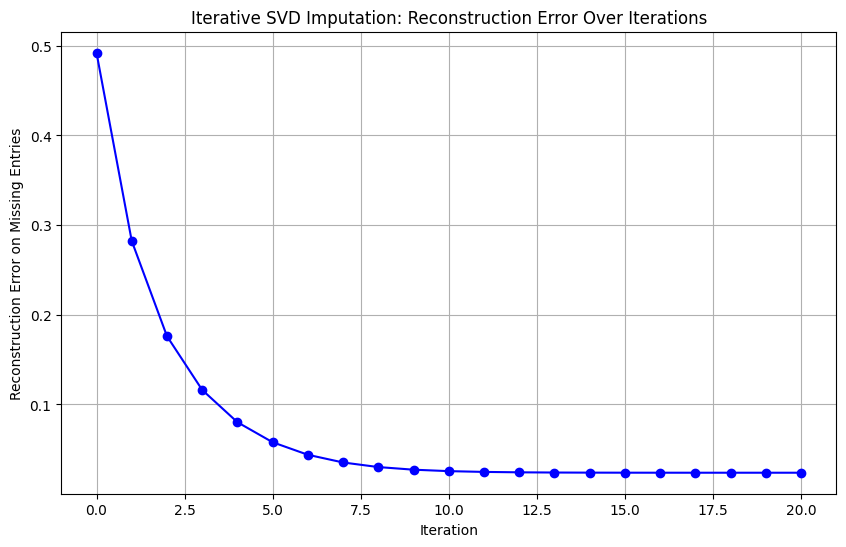

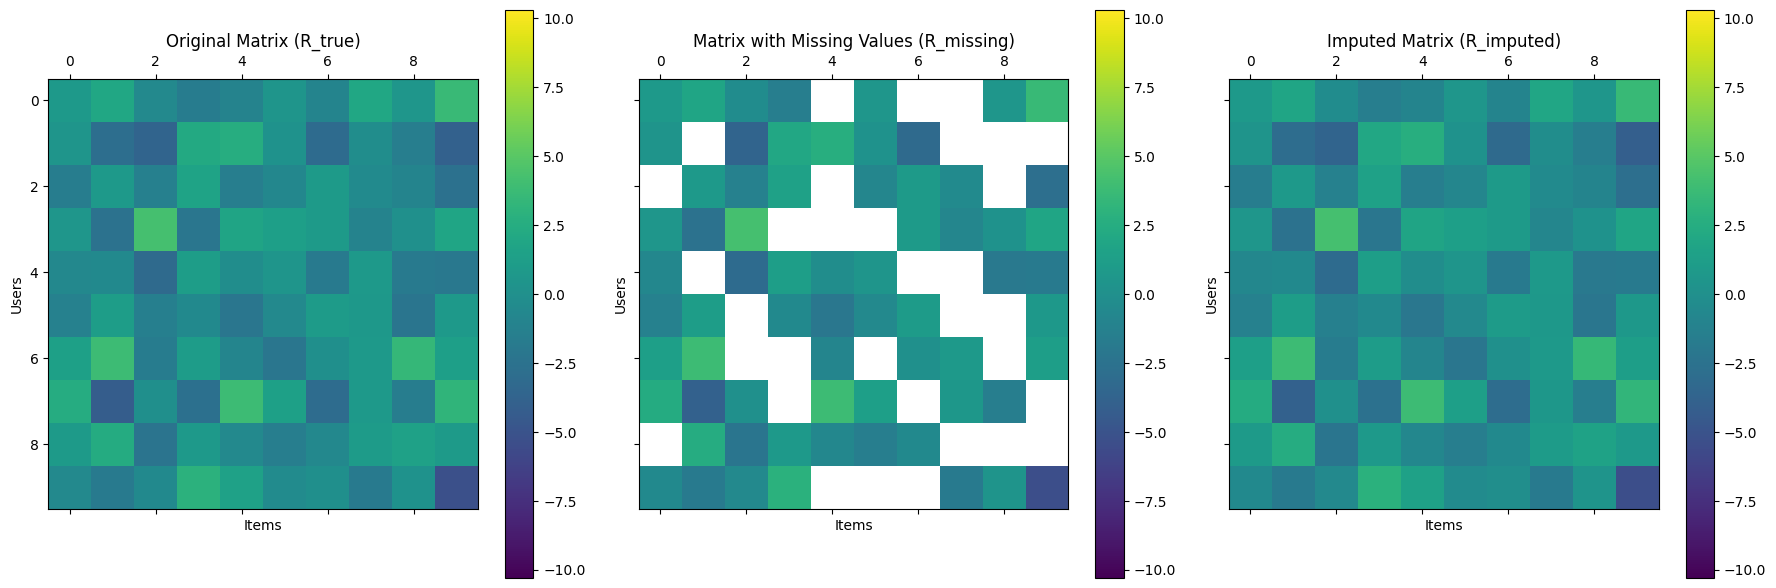

In [46]:
# Plot reconstruction error over iterations
plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error on Missing Entries')
plt.title('Iterative SVD Imputation: Reconstruction Error Over Iterations')
plt.grid(True)
plt.show()

# Visualize a subset of the original, missing, and imputed matrices
def plot_matrices(R_true, R_missing, R_imputed, user_indices, item_indices):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    vmin, vmax = np.nanmin(R_true), np.nanmax(R_true)

    matrices = [(R_true, 'Original Matrix (R_true)'),
                (R_missing, 'Matrix with Missing Values (R_missing)'),
                (R_imputed, 'Imputed Matrix (R_imputed)')]

    for ax, (matrix, title) in zip(axes, matrices):
        cax = ax.matshow(matrix[np.ix_(user_indices, item_indices)], vmin=vmin, vmax=vmax, cmap='viridis')
        ax.set_title(title)
        ax.set_xlabel('Items')
        ax.set_ylabel('Users')
        fig.colorbar(cax, ax=ax)

    plt.tight_layout()
    plt.show()

# Select a subset of users and items to visualize
user_indices = np.arange(10)
item_indices = np.arange(10)

plot_matrices(R_true, R_missing, R_completed, user_indices, item_indices)